In [96]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as n
from collections import Counter
import cv2
from skimage.color import rgb2lab, deltaE_cie76
import os

%matplotlib inline

The type of this input is <class 'numpy.ndarray'>
Shape: (2250, 4000, 3)


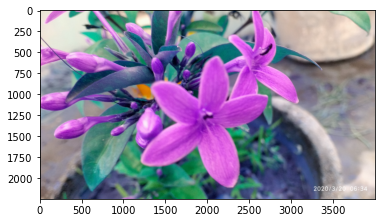

In [97]:
image = cv2.imread('IMG_20200320_063433.jpg')
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)

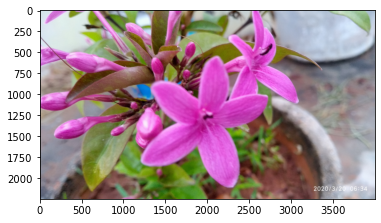

In [98]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

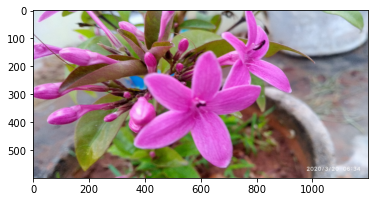

In [99]:
resized_image = cv2.resize(image, (1200, 600))
plt.imshow(resized_image)

In [100]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [101]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [102]:
def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    # sort to ensure correct color percentage
    counts = dict(sorted(counts.items()))
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    
    return rgb_colors

[array([76.39038844, 53.06166845, 32.61110262]),
 array([204.95607052, 208.27237567, 223.4608889 ]),
 array([168.12597321, 165.27965422, 165.74450424]),
 array([230.07309231, 113.75756747, 224.30635838]),
 array([119.98739108,  79.37686656,  74.51143004]),
 array([106.40584259, 128.88165942,  39.32254949]),
 array([137.77531577, 134.81034692, 126.52217023]),
 array([201.49626257,  63.14511556, 178.32971046])]

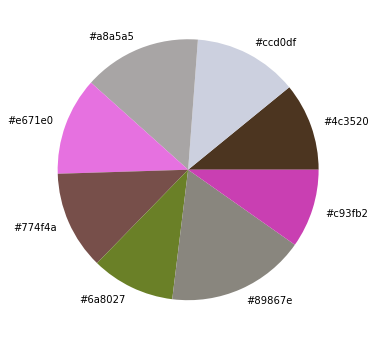

In [103]:
get_colors(get_image('IMG_20200320_063433.jpg'), 8, True)

In [104]:
IMAGE_DIRECTORY ='Untitled Folder'
COLORS = {
    'RED':[255, 0, 0],
        'GREEN':[0, 255, 0],
        'WHITE':[255,255,255],
        'MAGNETA':[255,0,255],
        'LIGHTPINK':[255,182,193],
        'ORANGE':[255,165,0],
        'YELLOW':[255,255,0],
        'LEAF GREEN':[0,128,0]
}
images = []

for file in os.listdir(IMAGE_DIRECTORY):
    if not file.startswith('.'):
        images.append(get_image(os.path.join(IMAGE_DIRECTORY, file)))

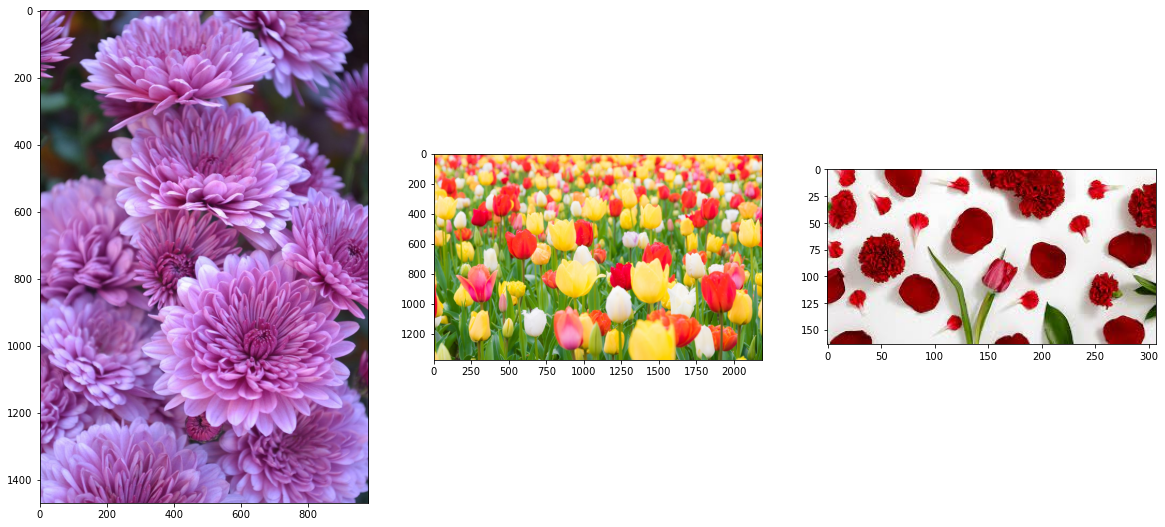

In [105]:
plt.figure(figsize=(20, 10))
for i in range(len(images)):
    plt.subplot(1, len(images), i+1)
    plt.imshow(images[i])

In [106]:
def match_image_by_color(image, color, threshold = 60, number_of_colors = 10): 
    
    image_colors = get_colors(image, number_of_colors, False)
    selected_color = rgb2lab(np.uint8(np.asarray([[color]])))

    select_image = False
    for i in range(number_of_colors):
        curr_color = rgb2lab(np.uint8(np.asarray([[image_colors[i]]])))
        diff = deltaE_cie76(selected_color, curr_color)
        if (diff < threshold):
            select_image = True
    
    return select_image

In [107]:
def show_selected_images(images, color, threshold, colors_to_match):
    index = 1
    
    for i in range(len(images)):
        selected = match_image_by_color(images[i],
                                        color,
                                        threshold,
                                        colors_to_match)
        if (selected):
            plt.subplot(1, 5, index)
            plt.imshow(images[i])
            index += 1

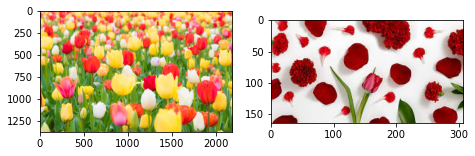

In [108]:
# Search for RED
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS["RED"], 60, 5)

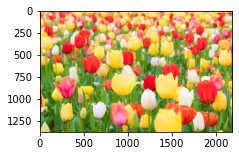

In [109]:
# Search for yellow
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['YELLOW'], 60, 5)